In [1]:
import os
import pandas as pd
path = r'/content/drive/MyDrive/Аспирантура/DATA' 
data = {}

Data = []
Target = []

i=0
for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=';')
            if df.shape[1] == 5:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=',')
            if df.shape[1] == 5:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

Populating the interactive namespace from numpy and matplotlib
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_1.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


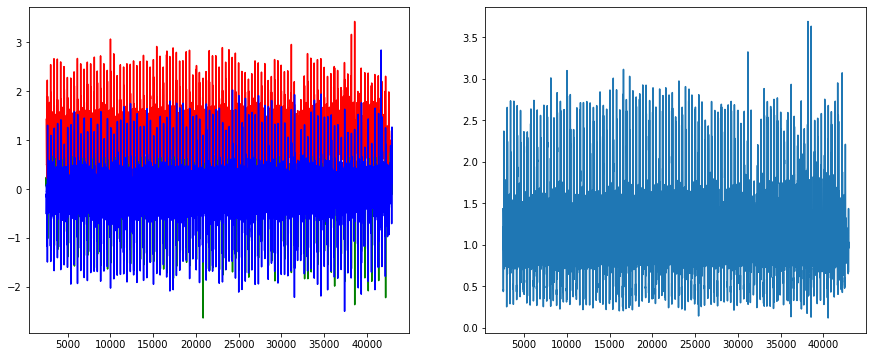

 АМПЛИТУДА: 3.5760860772671528

/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_2.csv


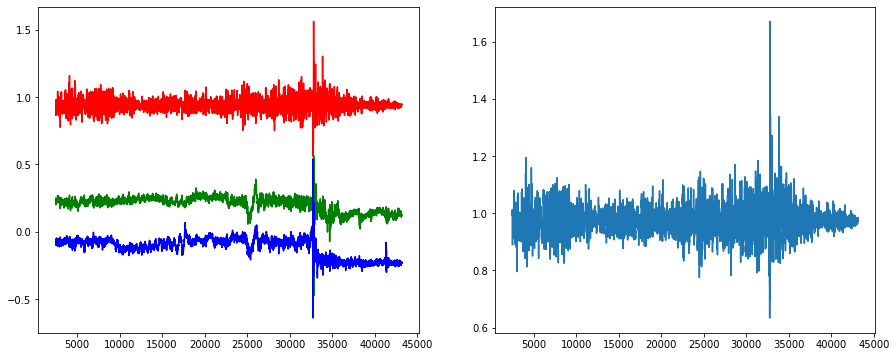

 АМПЛИТУДА: 1.0373227556571465

/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_1.csv


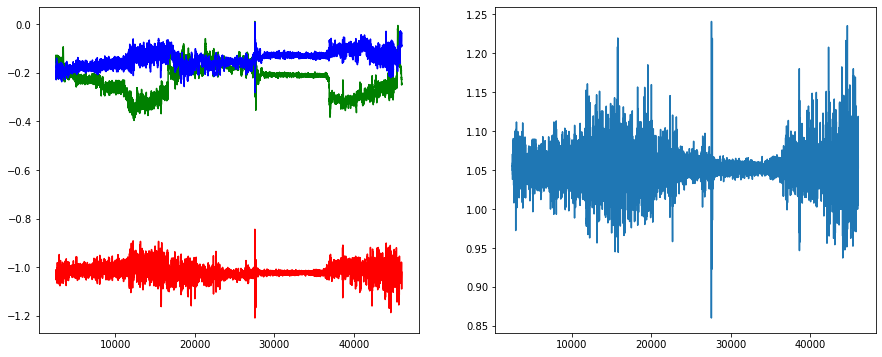

 АМПЛИТУДА: 0.3806515017895796

/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_1.csv


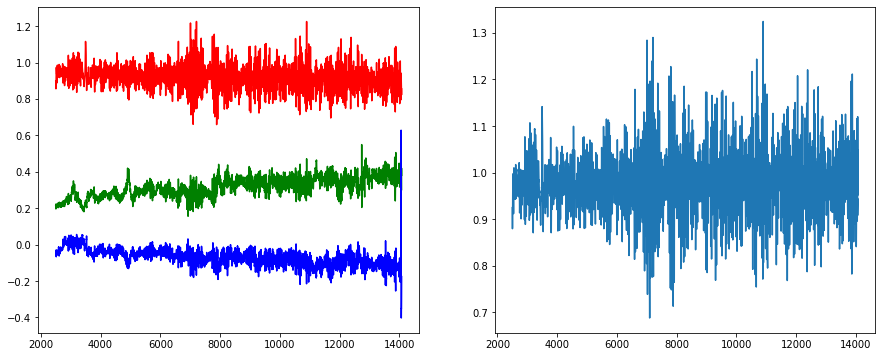

 АМПЛИТУДА: 0.6359523128551742

/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_3.csv


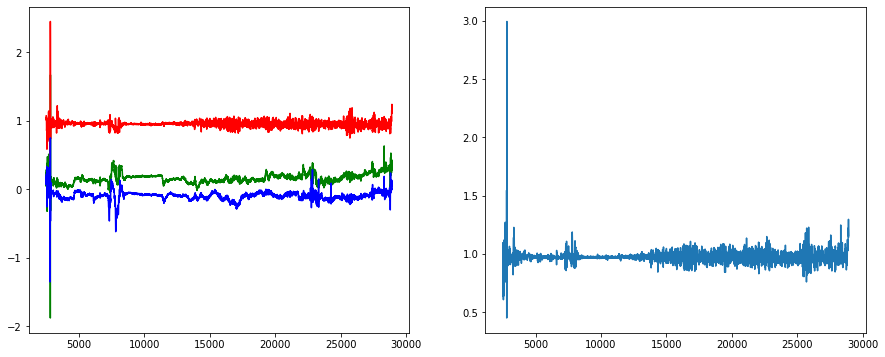

 АМПЛИТУДА: 2.546045971965683

/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_2.csv


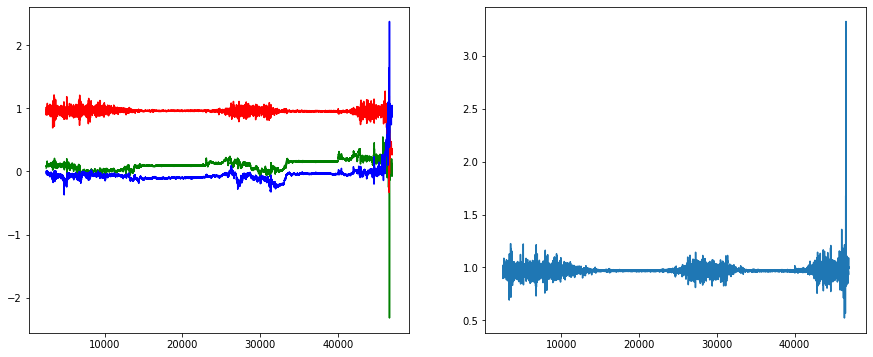

 АМПЛИТУДА: 2.7998837182510226

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_2.csv


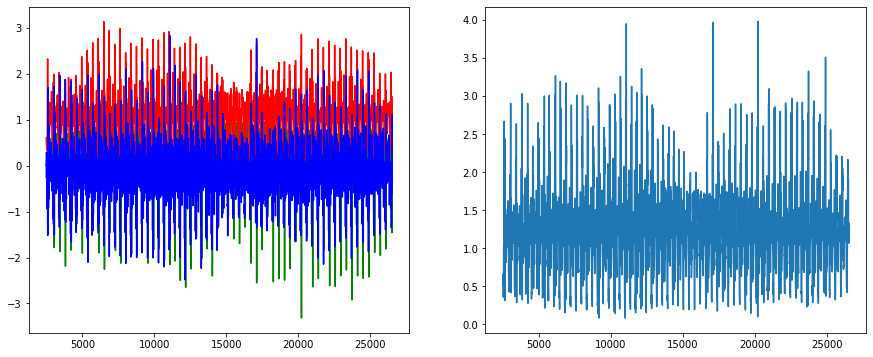

 АМПЛИТУДА: 3.8963406541453303

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_3.csv


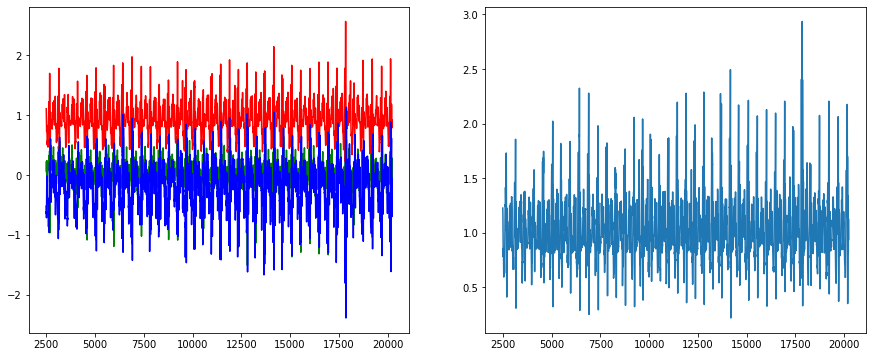

 АМПЛИТУДА: 2.714704063755221

/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_1.csv


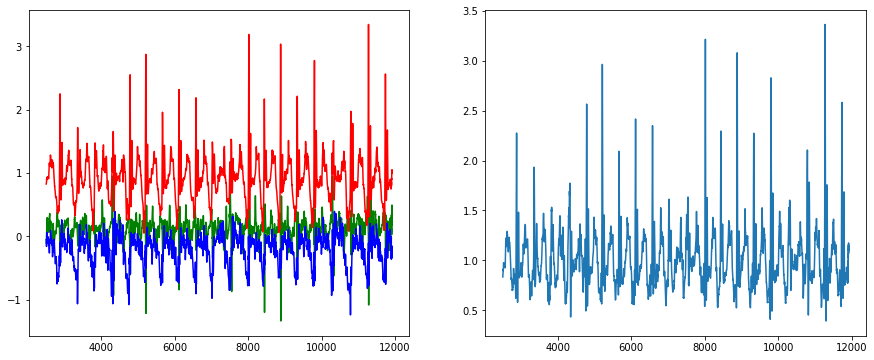

 АМПЛИТУДА: 2.9697282903472297

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_4.csv


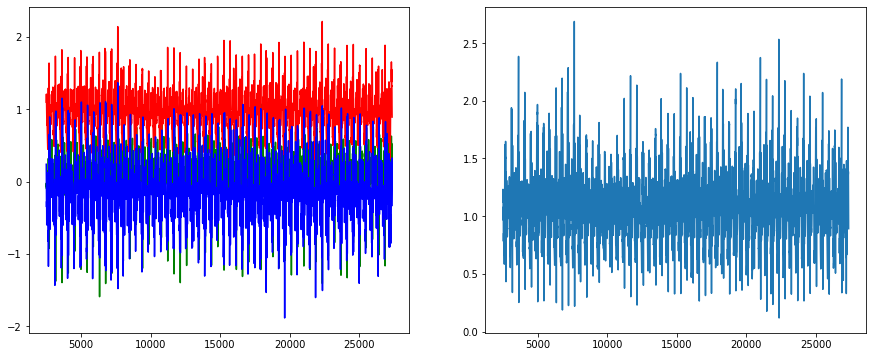

 АМПЛИТУДА: 2.569118121097181

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_5.csv


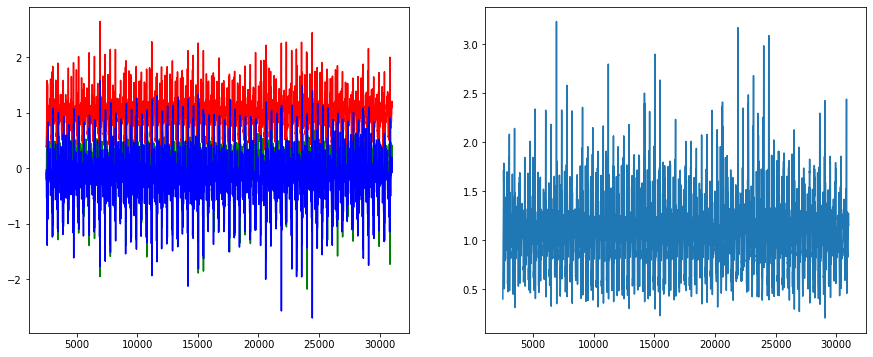

 АМПЛИТУДА: 3.024425350988732

/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_2.csv


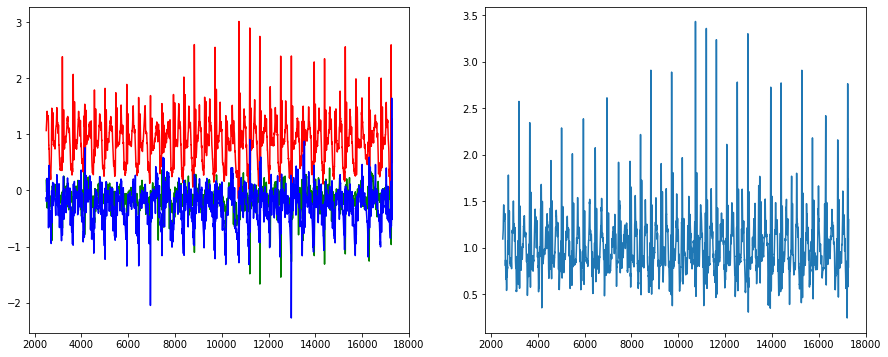

 АМПЛИТУДА: 3.1906005910940687

/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_3.csv


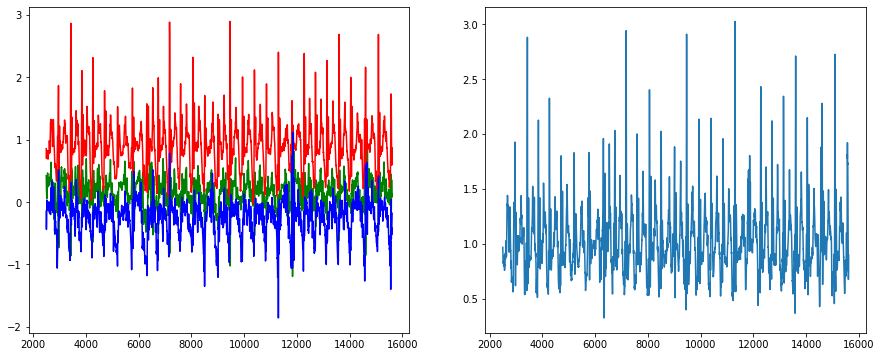

 АМПЛИТУДА: 2.70136718310036



In [4]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1):
    
# обрезаем начало и конец трека
    if a == -1:
        st = 2500
    else:
        st = a
            
    if b == -1:
        end = -2500
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name)
    fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))


    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)

    if cut:
        ax1.plot(df.iloc[st:end]['gFx'],c='g')
        ax1.plot(df.iloc[st:end]['gFy'],c='r')
        ax1.plot(df.iloc[st:end]['gFz'],c='b')
    else:
        ax1.plot(df['gFx'],c='g')
        ax1.plot(df['gFy'],c='r')
        ax1.plot(df['gFz'],c='b')
        

    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    ax2.plot(Acc)
    plt.show()


    print(' АМПЛИТУДА:', Acc.max()-Acc.min())
    print()
    
    return df


for df, target in zip(Data,Target):
    process_data(df, name=target)

In [5]:


def rotation_matrix_from_vectors(vec1, vec2):
    """ Find the rotation matrix that aligns vec1 to vec2
    :param vec1: A 3d "source" vector
    :param vec2: A 3d "destination" vector
    :return mat: A transform matrix (3x3) which when applied to vec1, aligns it with vec2.
    """
    a, b = (vec1 / numpy.linalg.norm(vec1)).reshape(3), (vec2 / numpy.linalg.norm(vec2)).reshape(3)
    v = numpy.cross(a, b)
    if any(v): #if not all zeros then 
        c = numpy.dot(a, b)
        s = numpy.linalg.norm(v)
        kmat = numpy.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
        return numpy.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))

    else:
        return numpy.eye(3) #cross of all zeros only occurs on identical directions



In [6]:
def rotate(X, Y, Z, Mat):
    new_x = []
    new_y = []
    new_z = []
    
    for elem in zip(X,Y,Z):
        res = Mat.dot(elem)
        new_x.append(res[0])
        new_y.append(res[1])
        new_z.append(res[2])
        
    return new_x, new_y, new_z

In [7]:
def integrate(lst):
    res = []
    s = 0
    for elem in lst:
        s += elem
        res.append(s)
    return res

In [8]:
import os
import pandas as pd
path = r'/content/drive/MyDrive/Аспирантура/DATA' 
data = {}

Data = []
Target = []

i=0
for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=';')
            if df.shape[1] != 5:
                print(dir_entry_path.split("\\")[-1], df.shape)
            else:
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

for dir_entry in os.listdir(path):
    dir_entry_path = os.path.join(path, dir_entry)
    if os.path.isfile(dir_entry_path):
        i+=1
        with open(dir_entry_path, 'r') as my_file:
            df = pd.read_csv(my_file, delimiter=',')
            if df.shape[1] == 5:
                print(dir_entry_path.split("\\")[-1])
                Data.append(df)
                Target.append(dir_entry_path.split("\\")[-1])

Populating the interactive namespace from numpy and matplotlib
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_1.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_1.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


New means: 2.5913892485153297e-18 1.0883834843764384e-16 0.9432591941493098


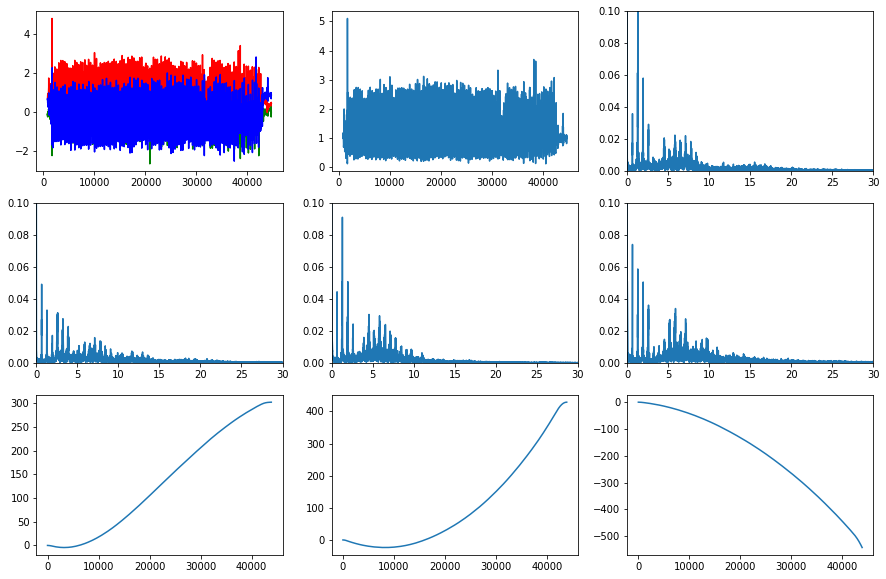

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_1.csv Амплитуда: 4.98279471739602
/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_2.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_2.csv
New means: -2.7748643496296172e-17 -1.677824955590001e-16 0.9531814311431909


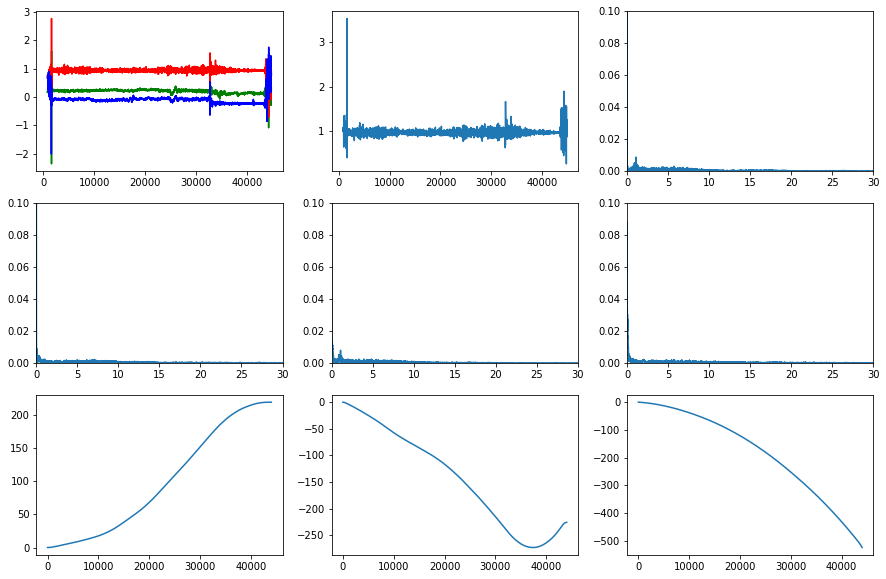

/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_2.csv Амплитуда: 3.265092697629721
/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_1.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_1.csv
New means: 2.4522352618904182e-17 6.751215597550164e-17 1.0427967114395782


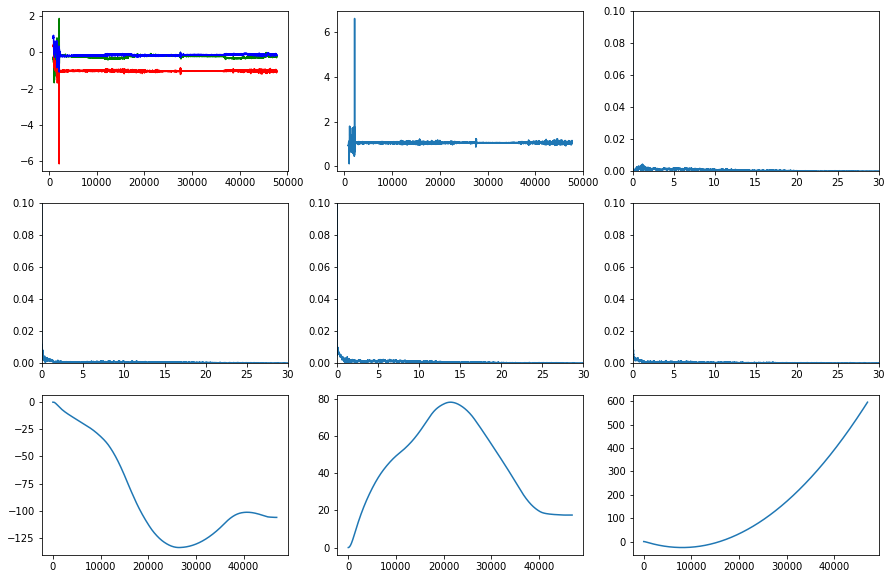

/content/drive/MyDrive/Аспирантура/DATA/Барышев_метро_1.csv Амплитуда: 6.516707011488875
/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_1.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_1.csv
New means: -1.0627066355763e-16 0.0 0.9661402489079366


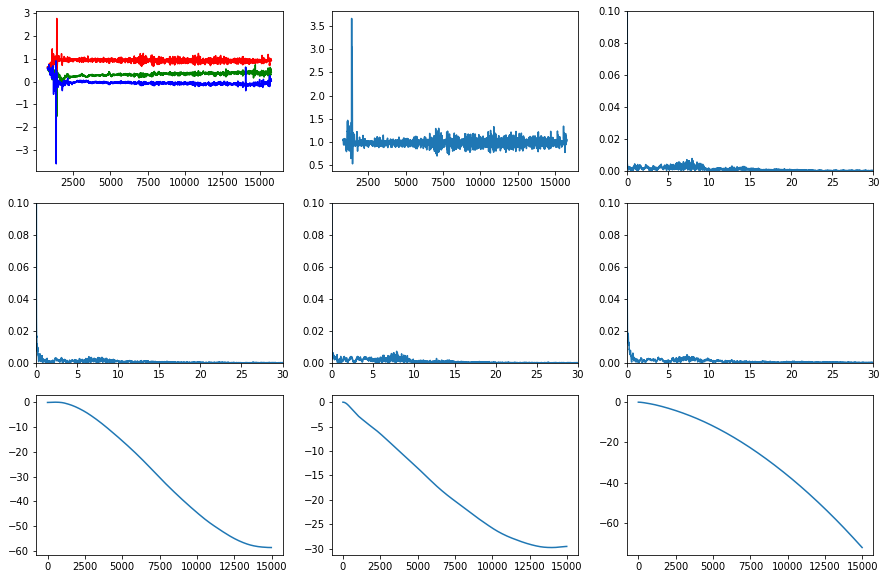

/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_1.csv Амплитуда: 3.151285182502397
/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_3.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_3.csv
New means: 1.8107855917700896e-17 9.911668502320491e-17 0.9235799647543974


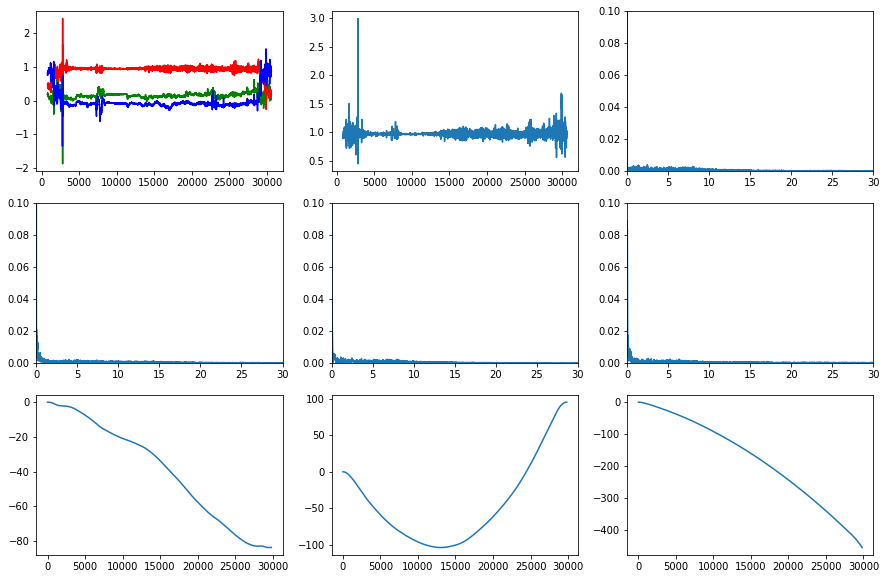

/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_3.csv Амплитуда: 2.546045971965683
/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_2.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_2.csv
New means: 1.782148823075245e-17 1.1405752467681567e-16 0.936896391076989


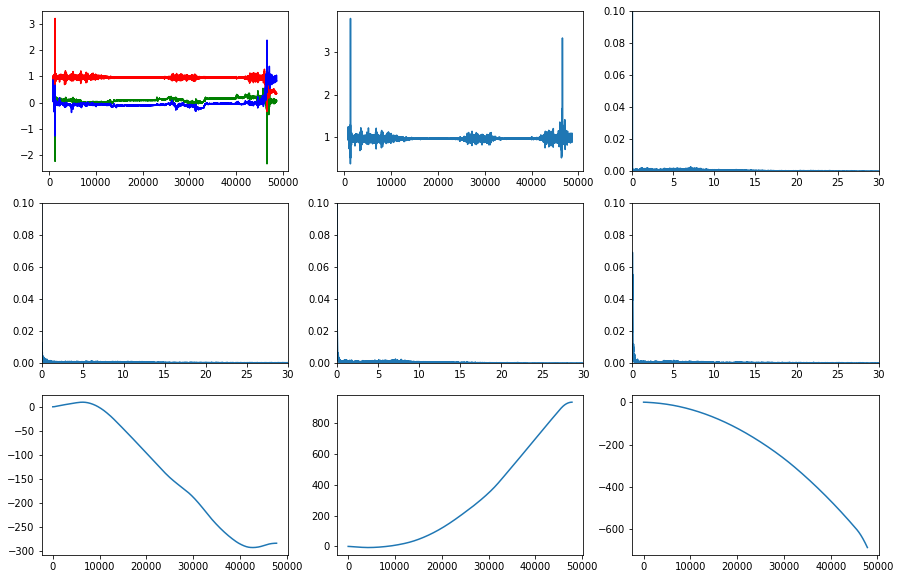

/content/drive/MyDrive/Аспирантура/DATA/Барышев_автобус_2.csv Амплитуда: 3.3954553379921433
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_2.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_2.csv
New means: -6.013640547801811e-17 -1.410095025001804e-16 0.9321574927375291


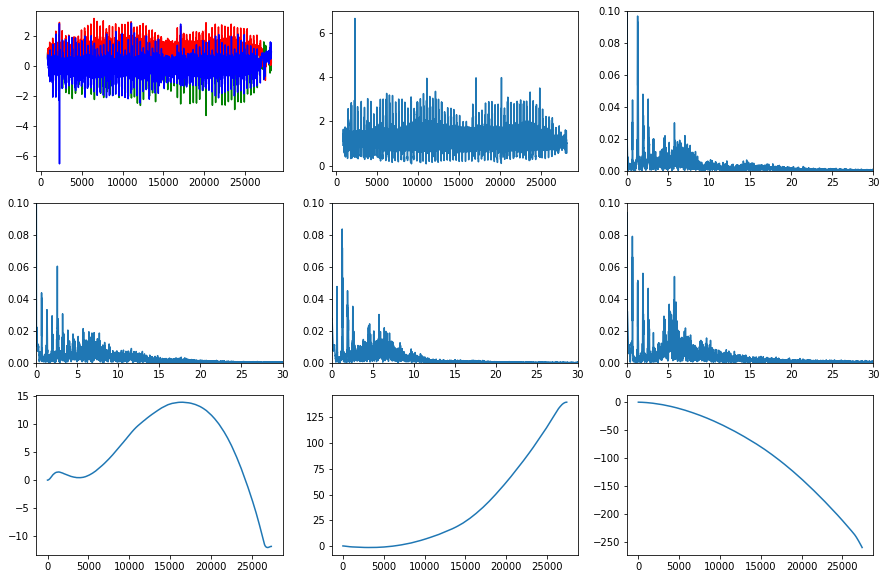

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_2.csv Амплитуда: 6.570496822845587
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_3.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_3.csv
New means: -1.0760703996366875e-17 1.7486143994096173e-17 0.9233255157986747


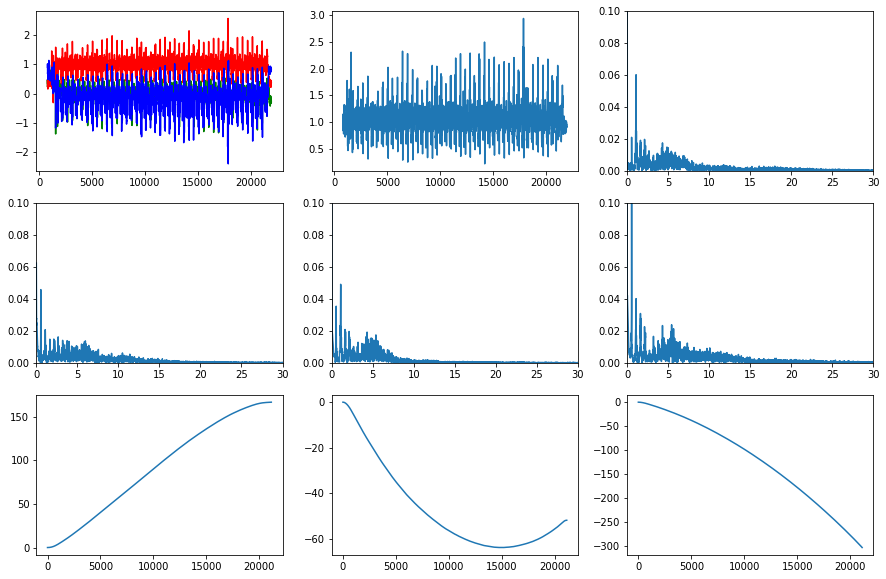

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_3.csv Амплитуда: 2.714704063755221
/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_1.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_1.csv
New means: -9.974085037574517e-18 -2.54893284293571e-17 0.9276920700681666


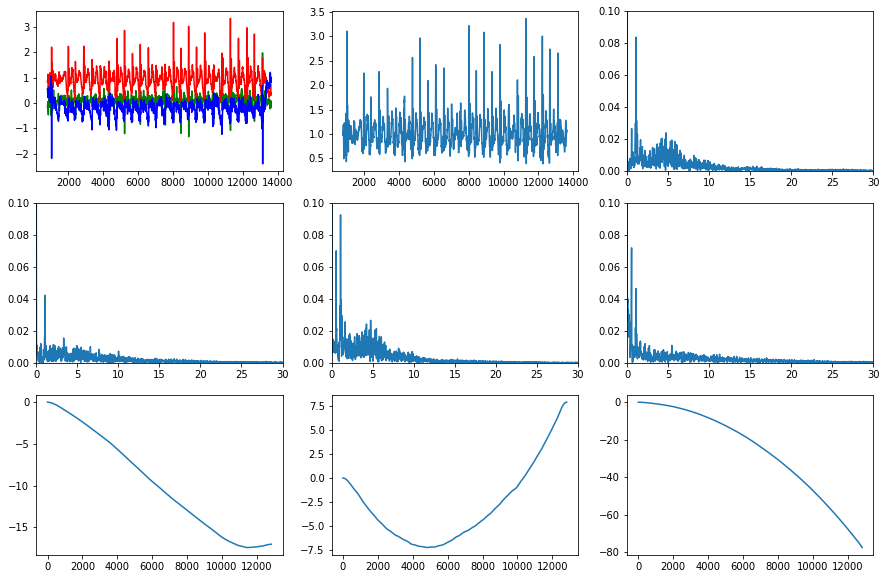

/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_1.csv Амплитуда: 2.9733497801104054
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_4.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_4.csv
New means: -3.2166037197981545e-17 -1.206226394924308e-16 0.9175611227451442


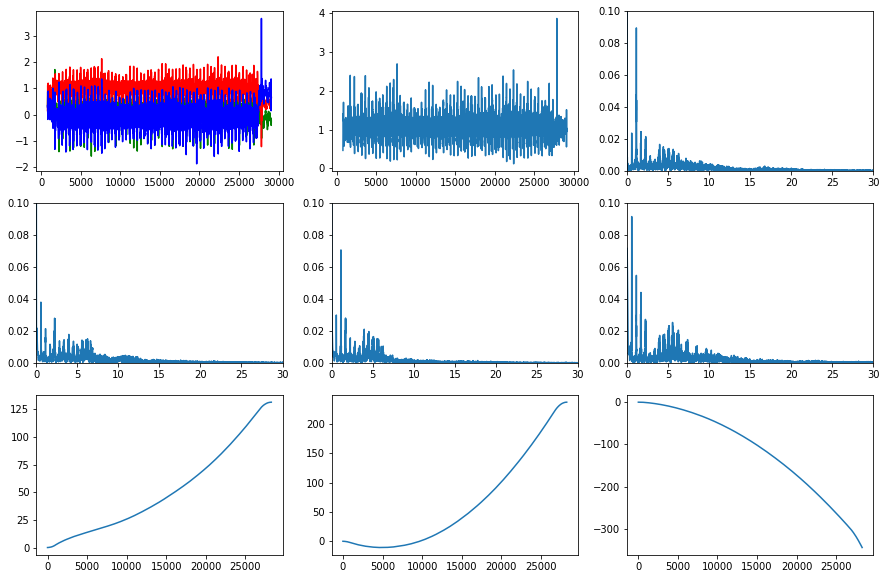

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_4.csv Амплитуда: 3.7370613821140592
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_5.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_5.csv
New means: -3.383642840801254e-17 -1.317839843259436e-16 0.9341398677418267


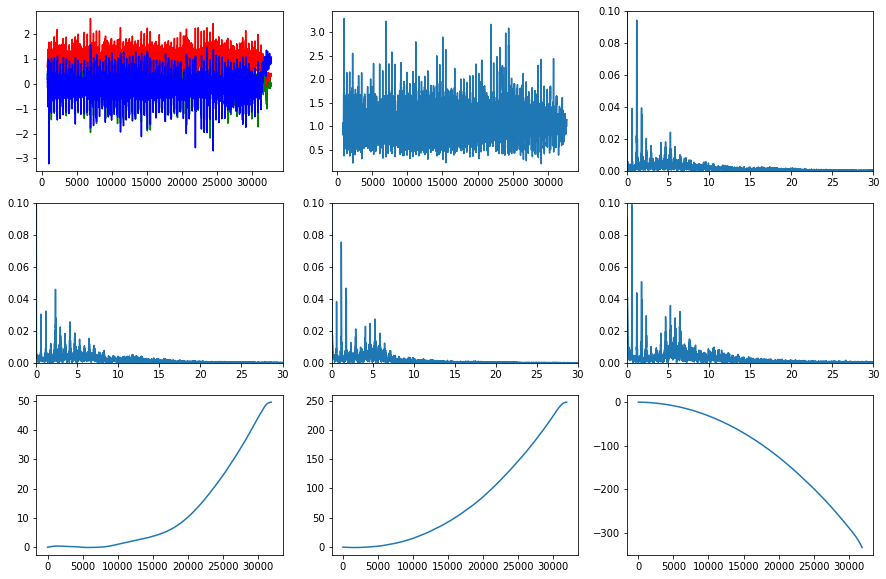

/content/drive/MyDrive/Аспирантура/DATA/Барышев_ходьба_5.csv Амплитуда: 3.085568783474997
/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_2.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_2.csv
New means: -1.406937929011804e-17 3.6736712590863767e-17 0.9129578166919717


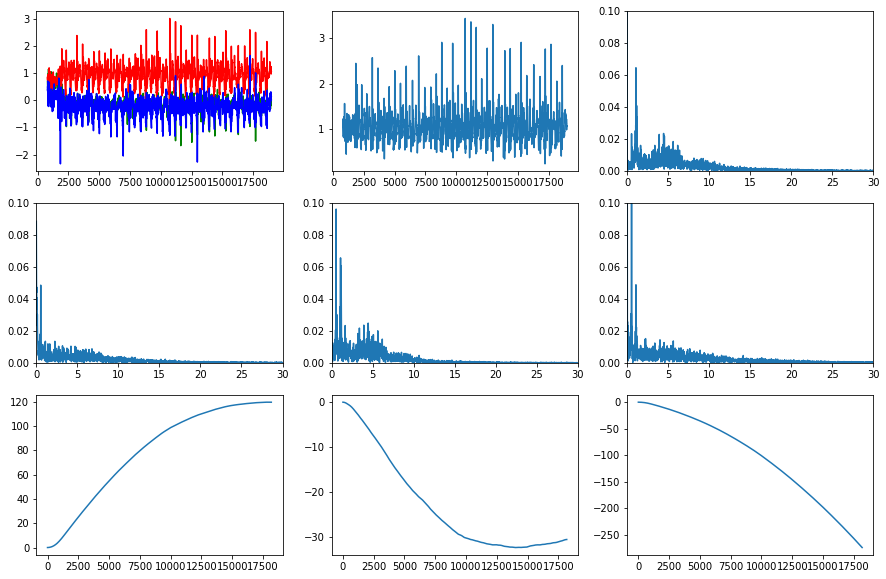

/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_2.csv Амплитуда: 3.1906005910940687
/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_3.csv
/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_3.csv
New means: -9.683936976559607e-18 3.184939272290715e-17 0.9275171542977864


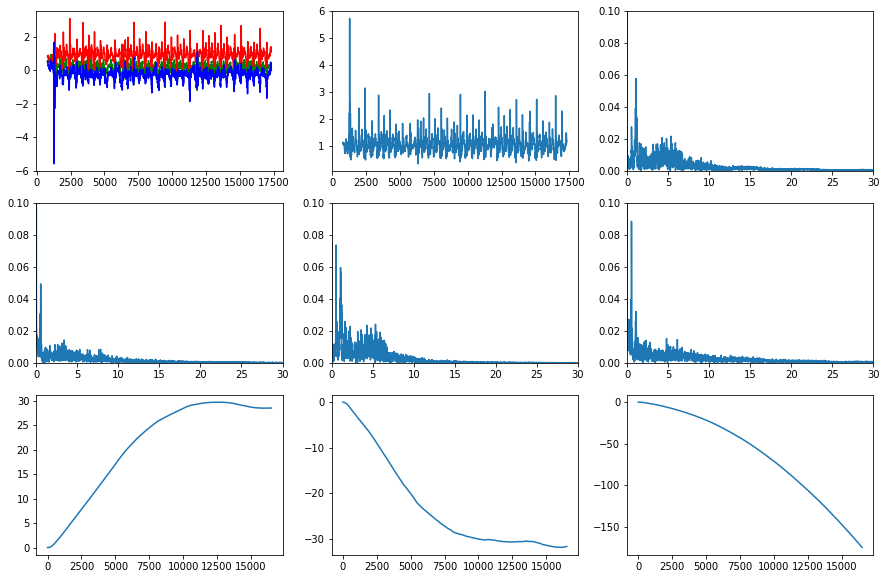

/content/drive/MyDrive/Аспирантура/DATA/Барышев_лестница_3.csv Амплитуда: 5.412396119053584


In [9]:
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

def process_data(df, comma=True, cut=True, name = "", a=-1, b=-1):
    
    print(name)
    
    if a == -1:
        st = 800
    else:
        st = a
            
    if b == -1:
        end = -800
    else:
        end = b
        
    if cut == False:
        st = 0
        end = -1

    print(name)
    fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
    
    if comma is True:
        df = df.applymap(lambda x: str(x).replace(',','.'))
        df['gFx'] = df['gFx'].astype(float)
        df['gFy'] = df['gFy'].astype(float)
        df['gFz'] = df['gFz'].astype(float)
    if cut:
        ax1.plot(df.iloc[st:end]['gFx'],c='g')
        ax1.plot(df.iloc[st:end]['gFy'],c='r')
        ax1.plot(df.iloc[st:end]['gFz'],c='b')
    else:
        ax1.plot(df['gFx'],c='g')
        ax1.plot(df['gFy'],c='r')
        ax1.plot(df['gFz'],c='b')
#        show()
########################################################################        
#integration

#вычисляем средний вектор ускорения по треку

    mx = df.iloc[st:end]['gFx'].values.mean() 
    my = df.iloc[st:end]['gFy'].values.mean() 
    mz = df.iloc[st:end]['gFz'].values.mean() 
    
#находим матрицу поворота этого вектора к вектору (0,0,1)

    Vec = [mx,my,mz]
    Point = [0, 0, 1]
    mat = rotation_matrix_from_vectors(Vec, Point)
    
#каждую точку трека поворачиваем на эту матрицу

    new_x, new_y, new_z = rotate(df.iloc[st:end]['gFx'].values, df.iloc[st:end]['gFy'].values, df.iloc[st:end]['gFz'].values, mat)

#проверяем, что новые средние равны примерно (0,0,1). Если это не так, значит, телефон часто поворачивался при движении, и нам не поможет это преобразование

    print('New means:', mean(new_x), mean(new_y), mean(new_z))

#делим на 250*250 (это нужно было еще при интегрировании)
    new_x = [elem / 62500 for elem in new_x]
    new_y = [elem / 62500 for elem in new_y]
#из ускорения по z вычитаем 1 (g), чтобы убрать влияние силы тяжести и оставить только ускорение по z
    new_z = [(elem-1)/62500 for elem in new_z]
    
#дважды интегрируем ускорение, чтобы получить перемещение вдоль каждой оси
    int_x = integrate(integrate(new_x))
    ax7.plot(int_x)
    
    int_y = integrate(integrate(new_y))
    ax8.plot(int_y)
    
    int_z = integrate(integrate(new_z))
    ax9.plot(int_z)

########################################################################        
#преобразование Фурье
########################################################################        

    Fs = 250 #частота сбора данных
    y = df.iloc[st:end]['gFx'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    Min = 0
    
    ax4.plot(frq,yabs) # plotting the spectrum
    ax4.set_xlim([0,30]) #очень большие частоты нам не нужны
    ax4.set_ylim([Min,0.1]) #не смотрим на близкие к нулю величины частот

    
    y = df.iloc[st:end]['gFy'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    ax5.plot(frq,yabs) # plotting the spectrum
    ax5.set_xlim([0,30])
    ax5.set_ylim([Min,0.1])


    y = df.iloc[st:end]['gFz'].values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
   
    ax6.plot(frq,yabs) # plotting the spectrum
    ax6.set_xlim([0,30])
    ax6.set_ylim([Min,0.1])


    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5

    y = Acc.values
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[:len(frq)//2] # one side frequency range

    Y = np.fft.fft(y)/n # dft and normalization
    Y = Y[:n//2]
    
    yabs = abs(Y)
    
    ax3.plot(frq,yabs) # plotting the spectrum
    ax3.set_xlim([0,30])
    ax3.set_ylim([Min,0.1])
########################################################################        
    
    Acc = (df.gFx[st:end] ** 2 + df.gFy[st:end] ** 2 + df.gFz[st:end] ** 2) ** 0.5
    ax2.plot(Acc)
    plt.show()
    
    print(name + ' Амплитуда:', Acc.max()-Acc.min())
    
    return df

for df, target in zip(Data,Target):
    process_data(df, name=target)